# Early Stage Diabetes Detection

About Data

This dataset contains the sign and symptpom data of newly diabetic or would be diabetic patient.

Features of the dataset

1. Age: Age in years ranging from (20years to 65 years)
2. Gender: Male / Female
3. Polyuria: Yes / No
4. Polydipsia: Yes/ No
5. Sudden weight loss: Yes/ No
6. Weakness: Yes/ No
7. Polyphagia: Yes/ No
8. Genital Thrush: Yes/ No
9. Visual blurring: Yes/ No
10. Itching: Yes/ No
11. Irritability: Yes/No
12. Delayed healing: Yes/ No
13. Partial Paresis: Yes/ No
14. Muscle stiffness: yes/ No
15. Alopecia: Yes/ No
16. Obesity: Yes/ No

Class: Positive / Negative

In [61]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [62]:
df = pd.read_csv('diabetes_data_upload.csv')

In [63]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [64]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

Distribution of Target Variable

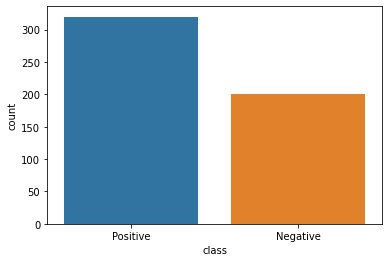

In [66]:
import seaborn as sns

sns.countplot(df['class'],data=df)

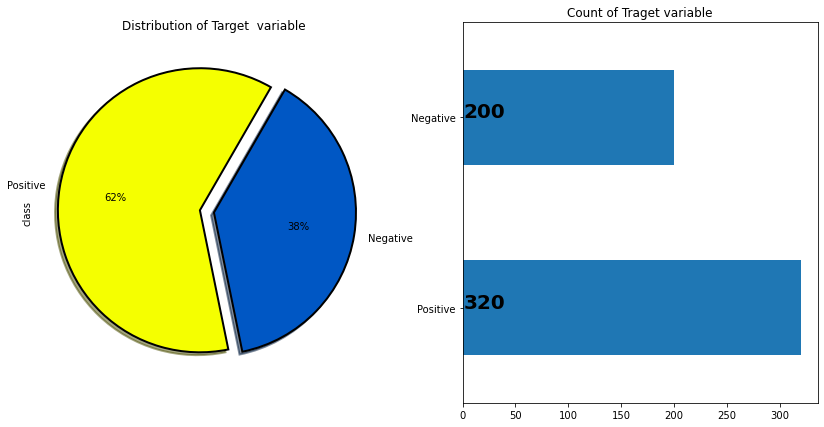

In [67]:
# plotting to create pie chart and bar plot as subplots
plt.figure(figsize=(14,7))
plt.subplot(121)
df["class"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["Positive","Negative"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of Target  variable")

plt.subplot(122)
ax = df["class"].value_counts().plot(kind="barh")

for i,j in enumerate(df["class"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of Traget variable")
plt.show()

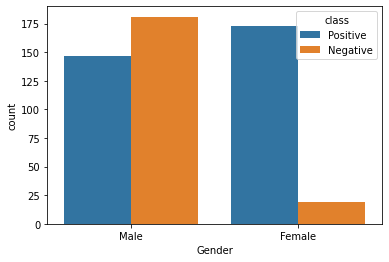

In [68]:
import seaborn as sns

sns.countplot(df['Gender'],hue=df['class'], data=df)

In [69]:
plot_criteria= ['Gender', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


## Distribution of Polydipsia

Polydipsia is the term given to excessive thirst and is one of the initial symptoms of diabetes. It is also usually accompanied by temporary or prolonged dryness of the mouth.

However, if you feel thirsty all the time or your thirst is stronger than usual and continues even after you drink, it can be a sign that not all is well inside your body.

Excessive thirst can be caused by high blood sugar (hyperglycemia), and is also one of the ‘Big 3’ signs of diabetes mellitus i.e.,

1. Polyuria
2. Polydipsia
3. Polyphagia

Generally, increased thirst (polydipsia) and an increased need to urinate (polyuria) will often come as a pair.

In [70]:
plot_criteria= ['Polydipsia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)
#

class,Negative,Positive
Polydipsia,,
No,96.000000,29.690000
Yes,4.000000,70.310000


## Distribution of sudden weight loss

In [71]:
plot_criteria= ['sudden weight loss', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
sudden weight loss,,
No,85.500000,41.250000
Yes,14.500000,58.750000


## Distribution of weakness

In [72]:
 
plot_criteria= ['weakness', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
weakness,,
No,56.500000,31.870000
Yes,43.500000,68.120000


 
## Distribution of Polyuria


Polyuria is defined as the frequent passage of large volumes of urine – more than 3 litres a day compared to the normal daily urine output in adults of about 1 to 2 litres.

In [73]:
plot_criteria= ['Polyuria', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Polyuria,,
No,92.500000,24.060000
Yes,7.500000,75.940000


## Distribution of Polyphagia

Polyphagia, also known as hyperphagia, is the medical term for excessive or extreme hunger.

It's different than having an increased appetite after exercise or other physical activity.

In [74]:
plot_criteria= ['Polyphagia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Polyphagia,,
No,76.000000,40.940000
Yes,24.000000,59.060000


## Distribution of genital thrush

Thrush (or candidiasis) is a common condition caused by a type of yeast called Candida. It mainly affects the vagina, though may affect the penis too, and can be irritating and painful.

In [75]:
plot_criteria= ['Genital thrush', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Genital thrush,,
No,83.500000,74.060000
Yes,16.500000,25.940000


## Distribution of Visual Blurring

In [76]:
plot_criteria= ['visual blurring', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
visual blurring,,
No,71.000000,45.310000
Yes,29.000000,54.690000


## Itching

plot_criteria= ['Itching', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)


## Delayed Healing

In [77]:
plot_criteria= ['delayed healing', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
delayed healing,,
No,57.000000,52.190000
Yes,43.000000,47.810000


## Partial Paresis

Paresis involves the weakening of a muscle or group of muscles. It may also be referred to as partial or mild paralysis. Unlike paralysis, people with paresis can still move their muscles. These movements are just weaker than normal.

In [78]:

plot_criteria= ['partial paresis', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
partial paresis,,
No,84.000000,40.000000
Yes,16.000000,60.000000


## Muscle Stiffness

In [79]:
plot_criteria= ['muscle stiffness', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
muscle stiffness,,
No,70.000000,57.810000
Yes,30.000000,42.190000


## Alopecia

Sudden hair loss that starts with one or more circular bald patches that may overlap. Alopecia areata occurs when the immune system attacks hair follicles and may be brought on by severe stress. The main symptom is hair loss.

In [80]:
plot_criteria= ['Alopecia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)


class,Negative,Positive
Alopecia,,
No,49.500000,75.620000
Yes,50.500000,24.380000


## Obesity

In [81]:
plot_criteria= ['Obesity', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Obesity,,
No,86.500000,80.940000
Yes,13.500000,19.060000


# Data pre-processing

In [82]:
df['class'] = df['class'].apply(lambda x: 0 if x=='Negative' else 1)

In [106]:
#SEGREGATION
X= df.drop(['class'],axis=1)
y=df['class']


In [84]:
objList = X.select_dtypes(include = "object").columns
print (objList)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    X[feat] = le.fit_transform(X[feat].astype(str))

print (X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int32
 2   Polyuria            520 non-null    int32
 3   Polydipsia          520 non-null    int32
 4   sudden weight loss  520 non-null    int32
 5   weakness            520 non-null    int32
 6   Polyphagia          520 non-null    int32
 7   Genital thrush      520 non-null    int32
 8   visual blurring     520 non-null    int32
 9   Itching             520 non-null    int32
 10  Irritability        520 non-null    int32
 11  delayed healing     520 non-null    int32
 12  partial paresis     520 non-null    int32
 13  muscle stiffness    520 non-null    int32
 14  Alopecia            520 non-null    int32
 15  Obesity             520 non-null    int32
dtypes: int32(15), int64(1)
memory usage: 34.7 KB

In [86]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


Correlation

In [87]:
X.corrwith(y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

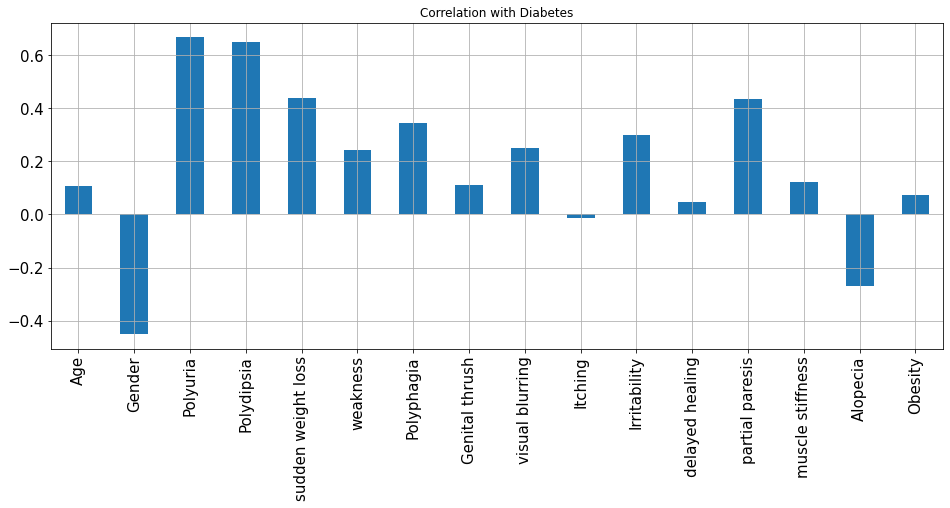

In [88]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
        figsize = (16, 6), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 1234)

In [90]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
1    256
0    160
Name: class, dtype: int64
Distribution of traget variable in test set
1    64
0    40
Name: class, dtype: int64


In [91]:
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

In [92]:
X_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
246,0.405405,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0
274,0.554054,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
424,0.364865,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0
316,0.527027,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0
159,0.297297,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0


Model Building

1. Logistic Regression (Base model)

In [93]:
logi = LogisticRegression(random_state = 0, penalty = 'l2')
logi.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [94]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'

acc_logi = cross_val_score(estimator = logi, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_logi.mean()

0.9181184668989548

In [96]:
y_predict_logi = logi.predict(X_test)
acc= accuracy_score(y_test, y_predict_logi)
roc=roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

results = pd.DataFrame([['Logistic Regression',acc, acc_logi.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.971154,0.918118,0.984127,0.96875,0.976378,0.971875


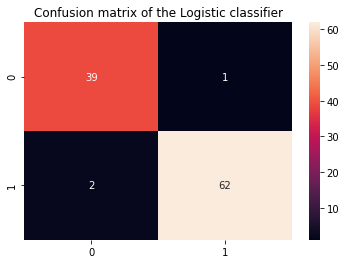

In [97]:

cm_logi = confusion_matrix(y_test, y_predict_logi)
plt.title('Confusion matrix of the Logistic classifier')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.show()

In [98]:
TP = cm_logi[1,1] # true positive 
TN = cm_logi[0,0] # true negatives
FP = cm_logi[0,1] # false positives
FN = cm_logi[1,0] # false negatives
# Let us calculate specificity
TN / float(TN+FP)

0.975

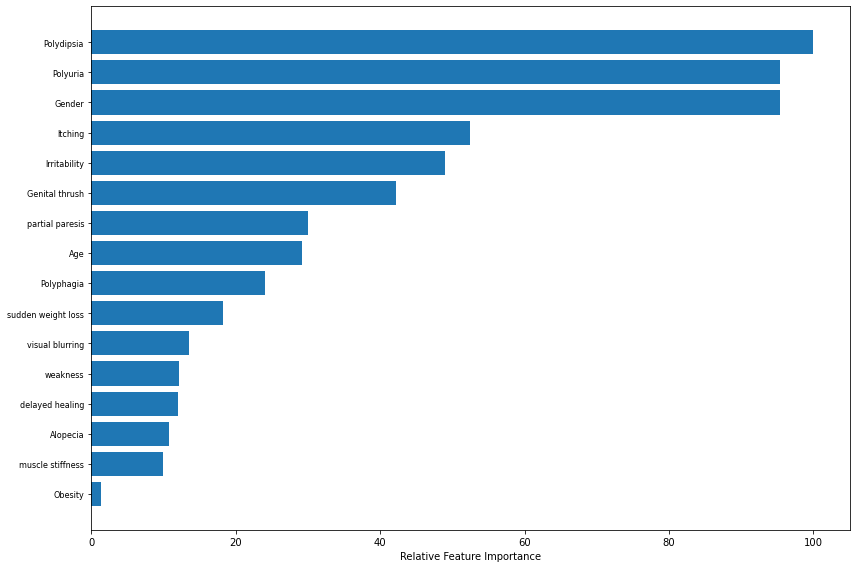

In [99]:
feature_importance = abs(logi.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .3

featfig = plt.figure(figsize=(12,8))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

## 2. Random forest (Before Tuning)

In [100]:
rf = RandomForestClassifier(criterion='gini',n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [101]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'

acc_rf = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_rf.mean()

0.9757839721254357

In [102]:
y_predict_r = rf.predict(X_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Random Forest (Untuned)',acc, acc_rf.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.971154,0.918118,0.984127,0.968750,0.976378,0.971875
1,Random Forest (Untuned),0.990385,0.975784,1.000000,0.984375,0.992126,0.992188


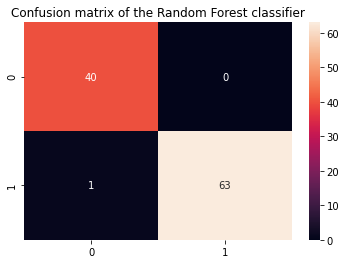

In [103]:
cm_rf = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the Random Forest classifier')
sns.heatmap(cm_rf,annot=True,fmt="d")
plt.show()

In [104]:
TP = cm_rf[1,1] # true positive 
TN = cm_rf[0,0] # true negatives
FP = cm_rf[0,1] # false positives
FN = cm_rf[1,0] # false negatives
# Let us calculate specificity
TN / float(TN+FP)

1.0

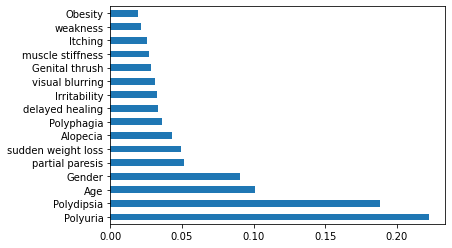

In [105]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')